# PHASE 2 PROJECT
# Defining the question

## Specific question
We are charged with exploring what types of films are currently doing the best at the box office based on the data provided. We must then translate those findings into actionable insights that the head of our company's new movie studio can use to help decide what type of films to create.

# 1. Business Understanding 

Our company wants to enter the film industry by creating a new movie studio but they lack any knowledge on filmmaking so we are required to perform an analysis on the available movie datasets to determine to the types of movies that perform the best in terms of popularity and box office revenue

 ## 1.1 OBJECTIVES

## 1.1.1 Main objective
*To determine which genre of movies is the most popular but also yields high revenue.*

## 1.1.2 Specific objectives
* *To determine which genre of movies is the most popular.*
* *To determine which genre of movies generates the most revenue.*
* *To evaluate the relationship between movie budgets and box office revenue.*
* *To examine the correlation between ratings and revenue*


# 2. Data Understanding


* Imdb movie_basics and movie_ratings datasets - These are Imdb datasets that include movie names, their release dates, average ratings and their genres.
* The Numbers movie budgets dataset - dataset from The Numbers which includes movies, their production budgets and the revenue they generated.


In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('im.db')

In [3]:
imdb_df = pd.read_sql(
    """
    SELECT original_title AS movie, movie_ratings.movie_id, averagerating, genres, start_year AS release_date, numvotes
    FROM movie_ratings
    JOIN movie_basics
    ON movie_ratings.movie_id=movie_basics.movie_id
    
    """
, conn
)
imdb_df

,movie,movie_id,averagerating,genres,release_date,numvotes
0,Laiye Je Yaarian,tt10356526,8.3,Romance,2019,31
1,Borderless,tt10384606,8.9,Documentary,2019,559
2,Just Inès,tt1042974,6.4,Drama,2010,20
3,The Legend of Hercules,tt1043726,4.2,"Action,Adventure,Fantasy",2014,50352
4,Até Onde?,tt1060240,6.5,"Mystery,Thriller",2011,21
...,...,...,...,...,...,...
73851,Caisa,tt9805820,8.1,Documentary,2018,25
73852,Code Geass: Lelouch of the Rebellion Episode III,tt9844256,7.5,"Action,Animation,Sci-Fi",2018,24
73853,Sisters,tt9851050,4.7,"Action,Drama",2019,14
73854,The Projectionist,tt9886934,7.0,Documentary,2019,5


In [4]:
imdb_df.shape

(73856, 6)

In [5]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie          73856 non-null  object 
 1   movie_id       73856 non-null  object 
 2   averagerating  73856 non-null  float64
 3   genres         73052 non-null  object 
 4   release_date   73856 non-null  int64  
 5   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.4+ MB


In [6]:
imdb_df.describe()

,averagerating,release_date,numvotes
count,73856.000000,73856.000000,7.385600e+04
mean,6.332729,2014.276132,3.523662e+03
std,1.474978,2.614807,3.029402e+04
min,1.000000,2010.000000,5.000000e+00
25%,5.500000,2012.000000,1.400000e+01
50%,6.500000,2014.000000,4.900000e+01
75%,7.400000,2016.000000,2.820000e+02
max,10.000000,2019.000000,1.841066e+06


In [7]:
imdb_df.isna().sum()*100/len(imdb_df)

movie            0.000000
movie_id         0.000000
averagerating    0.000000
genres           1.088605
release_date     0.000000
numvotes         0.000000
dtype: float64

In [8]:
imdb_df.duplicated('movie').sum()

2759

In [9]:
# loading The Numbers dataset
tn = pd.read_csv('tn.movie_budgets.csv')
tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [11]:
tn.shape

(5782, 6)

In [12]:
tn.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [13]:
tn.isna().sum()*100/len(tn)

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [14]:
tn.duplicated().sum()

0

# 3. Data Preparation

## cleaning the imdb dataset

In [15]:
# removing duplicates from the imdb dataset
imdb_df = imdb_df.drop_duplicates(subset=['movie'])

In [16]:
imdb_df.duplicated('movie').sum()

0

In [17]:
imdb_df.isna().sum()*100/len(imdb_df)

movie            0.00000
movie_id         0.00000
averagerating    0.00000
genres           1.09006
release_date     0.00000
numvotes         0.00000
dtype: float64

In [18]:
imdb_df = imdb_df.dropna(subset=['genres'])

In [19]:
imdb_df.isna().sum()

movie            0
movie_id         0
averagerating    0
genres           0
release_date     0
numvotes         0
dtype: int64

In [20]:
# merging the two datasets
merged_df = pd.merge(tn, imdb_df, on='movie', how='left')
merged_df

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,genres,release_date_y,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,6.6,"Action,Adventure,Fantasy",2011.0,447624.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,6.0,"Action,Adventure,Sci-Fi",2019.0,24451.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,7.3,"Action,Adventure,Sci-Fi",2015.0,665594.0
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,5.6,"Horror,Sci-Fi,Thriller",2019.0,43.0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",NaN,NaN,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",NaN,NaN,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,tt2107644,5.4,"Drama,Horror,Thriller",2013.0,72.0


## cleaning the merged dataset

In [21]:
merged_df.isna().sum()*100/len(merged_df)

id                    0.000000
release_date_x        0.000000
movie                 0.000000
production_budget     0.000000
domestic_gross        0.000000
worldwide_gross       0.000000
movie_id             63.317191
averagerating        63.317191
genres               63.317191
release_date_y       63.317191
numvotes             63.317191
dtype: float64

In [22]:
merged_df = merged_df.dropna(subset=['genres'])

In [23]:
merged_df.isna().sum()*100/len(merged_df)

id                   0.0
release_date_x       0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
movie_id             0.0
averagerating        0.0
genres               0.0
release_date_y       0.0
numvotes             0.0
dtype: float64

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 1 to 5780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2121 non-null   int64  
 1   release_date_x     2121 non-null   object 
 2   movie              2121 non-null   object 
 3   production_budget  2121 non-null   object 
 4   domestic_gross     2121 non-null   object 
 5   worldwide_gross    2121 non-null   object 
 6   movie_id           2121 non-null   object 
 7   averagerating      2121 non-null   float64
 8   genres             2121 non-null   object 
 9   release_date_y     2121 non-null   float64
 10  numvotes           2121 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 198.8+ KB


In [25]:
merged_df = merged_df.rename({'release_date_y': 'release_date', 'release_date_x':'release_month'}, axis=1)

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 1 to 5780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2121 non-null   int64  
 1   release_month      2121 non-null   object 
 2   movie              2121 non-null   object 
 3   production_budget  2121 non-null   object 
 4   domestic_gross     2121 non-null   object 
 5   worldwide_gross    2121 non-null   object 
 6   movie_id           2121 non-null   object 
 7   averagerating      2121 non-null   float64
 8   genres             2121 non-null   object 
 9   release_date       2121 non-null   float64
 10  numvotes           2121 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 198.8+ KB


In [27]:
merged_df['release_month'] = pd.to_datetime(merged_df['release_month'], format='mixed')

In [28]:
merged_df['release_month'] = merged_df['release_month'].dt.month_name()

In [29]:
merged_df = merged_df.replace('[\$,]','', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\user\AppData\Local\Temp\ipykernel_20428\2318741753.py:1: SyntaxWarning: invalid escape sequence '\$'
  merged_df = merged_df.replace('[\$,]','', regex=True)


In [30]:
merged_df['release_date'] = merged_df['release_date'].astype(int)

In [31]:
merged_df['numvotes'] = merged_df['numvotes'].astype(int)

In [32]:
merged_df

,id,release_month,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,genres,release_date,numvotes
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,ActionAdventureFantasy,2011,447624
2,3,June,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,ActionAdventureSci-Fi,2019,24451
3,4,May,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,ActionAdventureSci-Fi,2015,665594
6,7,April,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,8.5,ActionAdventureSci-Fi,2018,670926
8,9,November,Justice League,300000000,229024295,655945209,tt0974015,6.5,ActionAdventureFantasy,2017,329135
...,...,...,...,...,...,...,...,...,...,...,...
5761,62,December,Stories of Our Lives,15000,0,0,tt3973612,7.5,Drama,2014,85
5767,68,July,Cure,10000,94596,94596,tt1872026,4.9,Drama,2011,11
5772,73,January,Newlyweds,9000,4584,4584,tt1880418,6.4,ComedyDrama,2011,1436
5777,78,December,Red 11,7000,0,0,tt7837402,5.6,HorrorSci-FiThriller,2019,43


In [33]:
merged_df[['production_budget', 'domestic_gross', 'worldwide_gross']] = merged_df[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(pd.to_numeric)

In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2121 entries, 1 to 5780
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2121 non-null   int64  
 1   release_month      2121 non-null   object 
 2   movie              2121 non-null   object 
 3   production_budget  2121 non-null   int64  
 4   domestic_gross     2121 non-null   int64  
 5   worldwide_gross    2121 non-null   int64  
 6   movie_id           2121 non-null   object 
 7   averagerating      2121 non-null   float64
 8   genres             2121 non-null   object 
 9   release_date       2121 non-null   int32  
 10  numvotes           2121 non-null   int32  
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 182.3+ KB


In [35]:
merged_df

,id,release_month,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,genres,release_date,numvotes
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,ActionAdventureFantasy,2011,447624
2,3,June,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,ActionAdventureSci-Fi,2019,24451
3,4,May,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,ActionAdventureSci-Fi,2015,665594
6,7,April,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,8.5,ActionAdventureSci-Fi,2018,670926
8,9,November,Justice League,300000000,229024295,655945209,tt0974015,6.5,ActionAdventureFantasy,2017,329135
...,...,...,...,...,...,...,...,...,...,...,...
5761,62,December,Stories of Our Lives,15000,0,0,tt3973612,7.5,Drama,2014,85
5767,68,July,Cure,10000,94596,94596,tt1872026,4.9,Drama,2011,11
5772,73,January,Newlyweds,9000,4584,4584,tt1880418,6.4,ComedyDrama,2011,1436
5777,78,December,Red 11,7000,0,0,tt7837402,5.6,HorrorSci-FiThriller,2019,43


In [36]:
merged_df['ROI(%)'] = ((merged_df['worldwide_gross']-merged_df['production_budget'])/merged_df['production_budget'])*100
merged_df['ROI(%)']

1       154.667286
2       -57.210757
3       324.384139
6       582.711400
8       118.648403
           ...    
5761   -100.000000
5767    845.960000
5772    -49.066667
5777   -100.000000
5780   -100.000000
Name: ROI(%), Length: 2121, dtype: float64

Return On Investment is a metric used to measure how profitable an investment is compared to its cost.
* an ROI of less than 0% is non-profitable investment
* 0%-50% is a low or moderate profit.
* 50%-100% is a reasonable profit.
* 100%-200% is a strong profit where the initial cost is doubled or more.
* more than 200% is a high profit.


# 4. Exploratory Data Analysis

## Univariate analysis

In [37]:
top_five_genres = merged_df['genres'].value_counts().head(5)
top_five_genres

genres
Drama                       145
Documentary                  75
Comedy                       74
ComedyDrama                  71
AdventureAnimationComedy     69
Name: count, dtype: int64

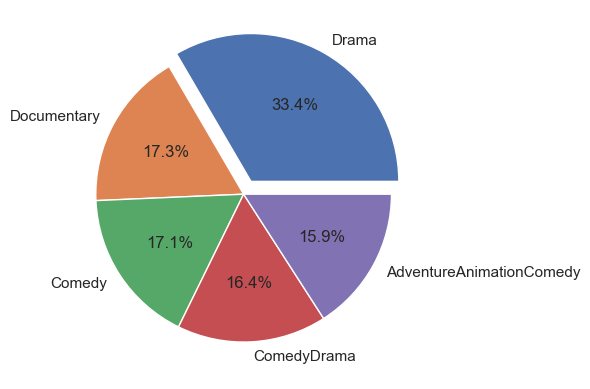

In [87]:
plt.pie(top_five_genres, autopct='%1.1f%%',explode=explode, labels=top_five_genres.index )
explode = [0.1, 0, 0, 0, 0]


The Drama genre appears the most in the dataset making up 33.4% of all genres in the dataset indicating demand from producers and viewers.

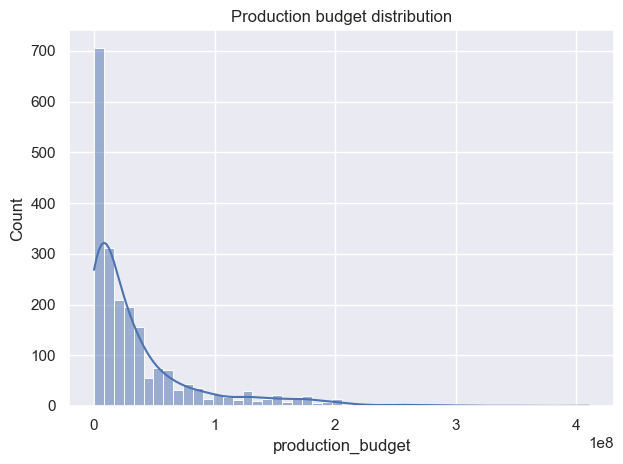

In [94]:
x=merged_df['production_budget']


sns.histplot(x, bins=50, kde=True)
plt.title('Production budget distribution')
plt.tight_layout()
plt.show()

The data is skewed to the right and the highest concentration is near zero, meaning most movies are low to mid budget.

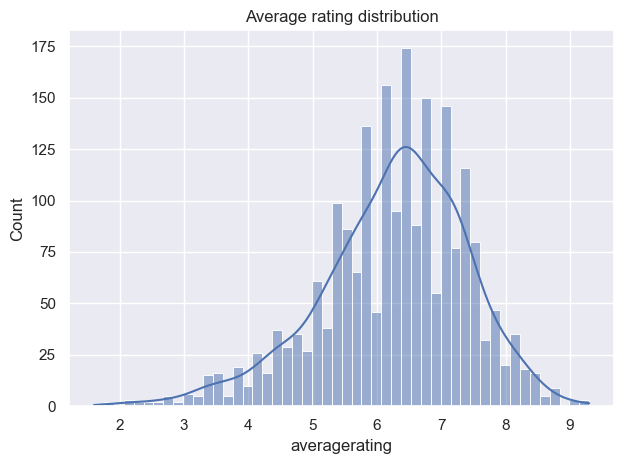

In [95]:
sns.histplot(merged_df['averagerating'], bins=50, kde=True)
plt.title('Average rating distribution')
plt.tight_layout()
plt.show()

The shape indicates an aproximately normally distributed that is slightly skewed to the left.

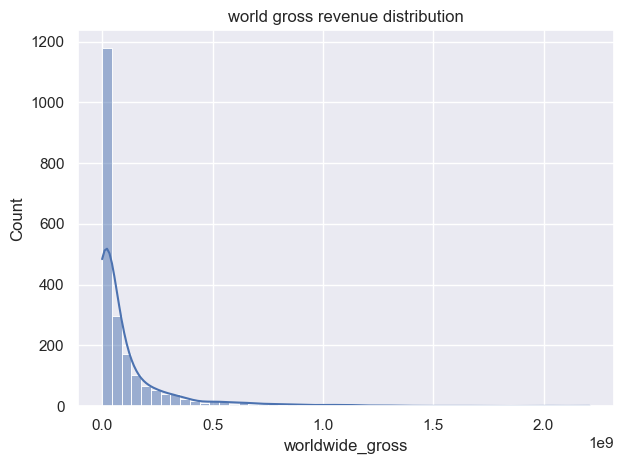

In [96]:
x=merged_df['worldwide_gross']


sns.histplot(x, bins=50, kde=True)
plt.title('world gross revenue distribution')
plt.tight_layout()
plt.show()

The data is skewed to the right and the highest concentration is near zero, meaning most movies do not earn a lot of revenue.

## Bivariate analysis

In [86]:
dates = merged_df.groupby('release_date')['worldwide_gross'].mean()
dates

release_date
2010    9.531933e+07
2011    8.653506e+07
2012    1.262472e+08
2013    9.445434e+07
2014    9.948418e+07
2015    8.984014e+07
2016    1.196725e+08
2017    1.673547e+08
2018    1.593665e+08
2019    1.242976e+08
Name: worldwide_gross, dtype: float64

Text(0.5, 1.0, 'Revenue per year')

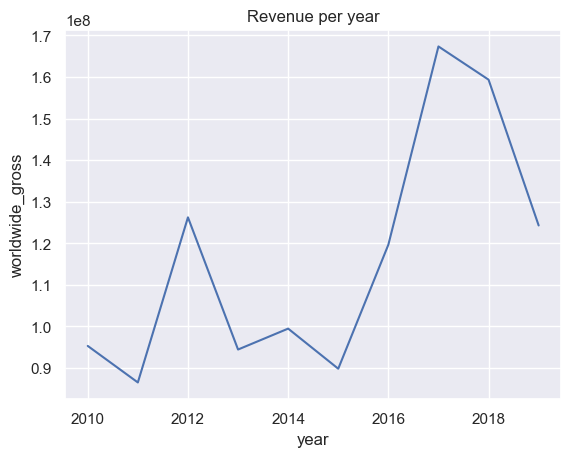

In [97]:
sns.lineplot(dates)
plt.xlabel('year')
plt.title('Revenue per year')

The year 2017 had the highest revenue of 167,354,700 dollars.

In [46]:
votes = merged_df.groupby('genres')['numvotes'].mean().sort_values(ascending=False).head()
votes

genres
AdventureDramaSci-Fi      989725.000000
AdventureMysterySci-Fi    538720.000000
DramaWestern              416522.666667
ActionAdventureSci-Fi     395407.264151
AdventureFantasy          375770.333333
Name: numvotes, dtype: float64

<Axes: title={'center': 'Genres with the highest number of votes'}, xlabel='genres', ylabel='numvotes'>

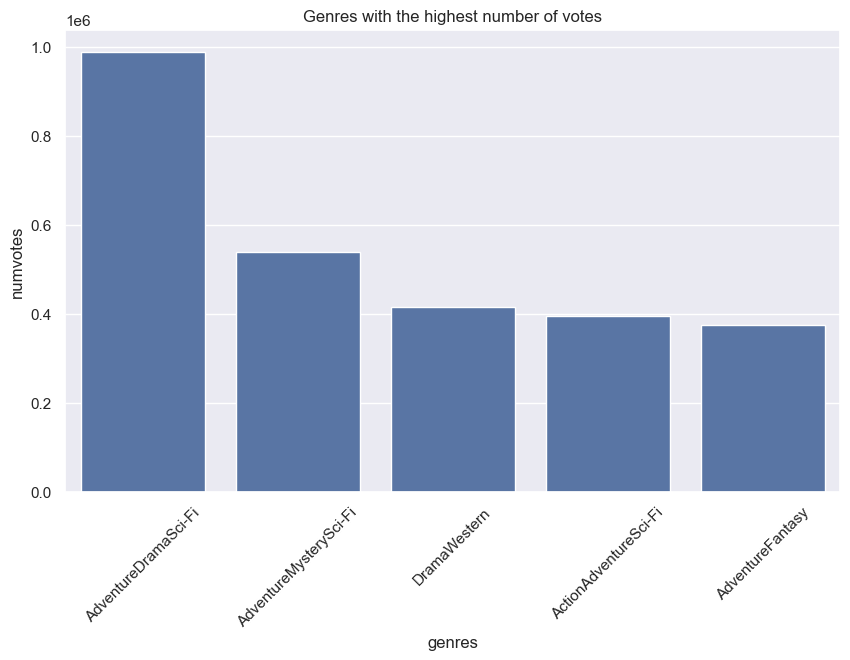

In [98]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.set_theme(font_scale=1.0)
plt.title('Genres with the highest number of votes')
sns.barplot(votes)

The AdventureDramaSci-Fi genre has the most number of votes in the dataset with 989,725 votes followed by AdventureMysterySci-Fi genre with 538,720 votes indicating they are the genres that receive the most engagement

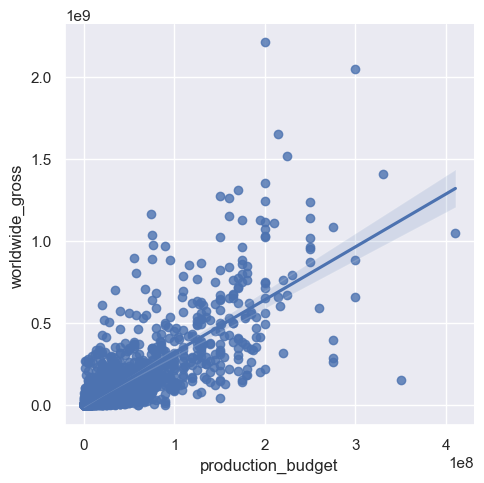

<Figure size 1000x600 with 0 Axes>

In [101]:
sns.lmplot(x='production_budget', y='worldwide_gross', data=merged_df)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

The regression line slopes upward, meaning there is a positive correlation indicating that as the production budget increases the worldwide revenue also increases.

In [49]:
revenues = merged_df.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False).head()
revenues

genres
AdventureDramaSport      1.272470e+09
FamilyFantasyMusical     9.338154e+08
AdventureFantasy         7.012107e+08
AdventureDramaSci-Fi     6.608254e+08
ActionAdventureSci-Fi    6.002202e+08
Name: worldwide_gross, dtype: float64

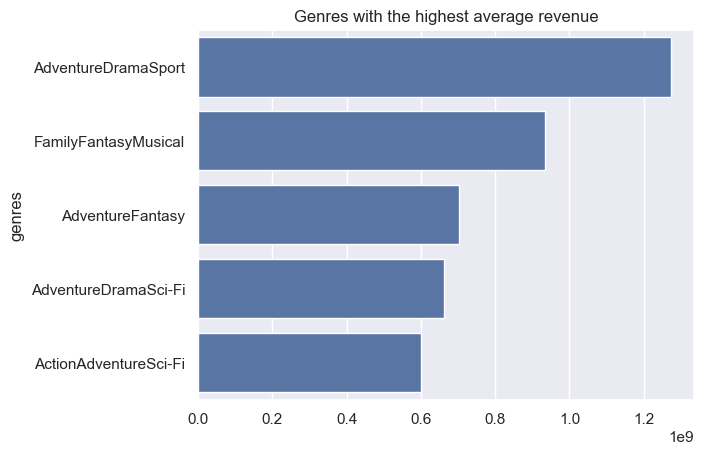

<Figure size 1000x600 with 0 Axes>

In [103]:
plt.title('Genres with the highest average revenue')
sns.barplot(x=revenues.values, y=revenues.index)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

Genres AdventureDramaSport and FamilyFantasyMusical lead the way in worldwide gross revenue having average revenues of 1.2 billion and 900 million dollars respectively.

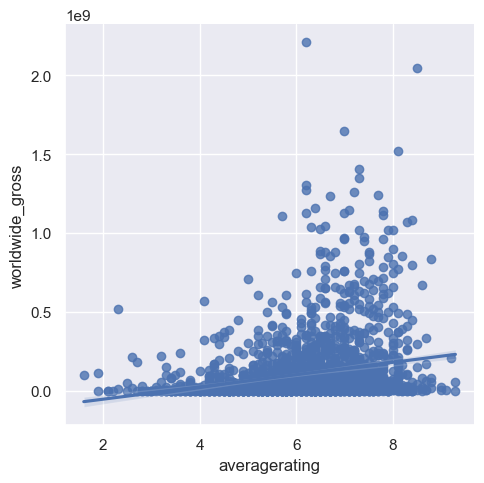

<Figure size 1000x600 with 0 Axes>

In [105]:
sns.lmplot(x='averagerating', y='worldwide_gross', data=merged_df)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

The regression line slopes slightly upward, meaning there is a weak positive correlation indicating that as the average rating increases the worldwide revenue also increases slightly.

In [81]:
ratings = merged_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head()
ratings

genres
BiographyCrimeDocumentary    9.00
ActionDocumentaryDrama       8.70
AdventureDramaSci-Fi         8.30
DramaMysteryWar              8.30
CrimeDocumentary             8.25
Name: averagerating, dtype: float64

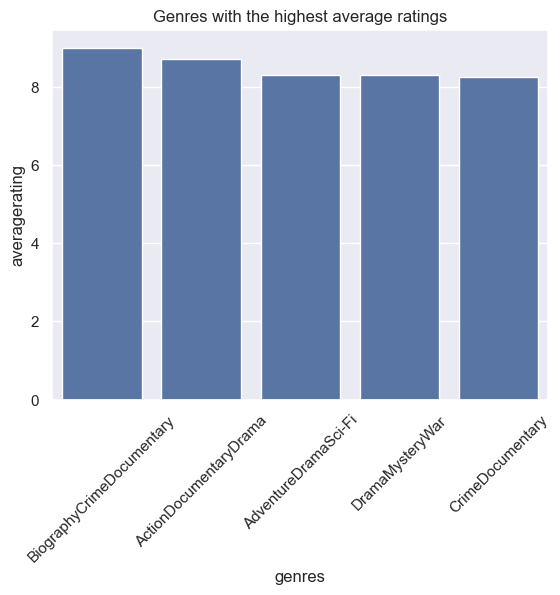

<Figure size 1000x600 with 0 Axes>

In [106]:
plt.title('Genres with the highest average ratings')
sns.barplot(ratings)
plt.xticks(rotation=45)
sns.set_theme(font_scale=1.0)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

Genre BiographyCrimeDocumentary has the highest average rating of 9.0 indicating that audiences who watch films in this category consistently rate them highly.

In [90]:
month = merged_df.groupby('release_month')['worldwide_gross'].mean().sort_values(ascending=False)
month

release_month
June         1.864404e+08
May          1.702677e+08
November     1.597887e+08
July         1.568081e+08
March        1.180738e+08
February     1.016663e+08
December     9.930369e+07
April        8.509595e+07
August       7.312322e+07
January      6.674811e+07
October      6.546748e+07
September    6.193053e+07
Name: worldwide_gross, dtype: float64

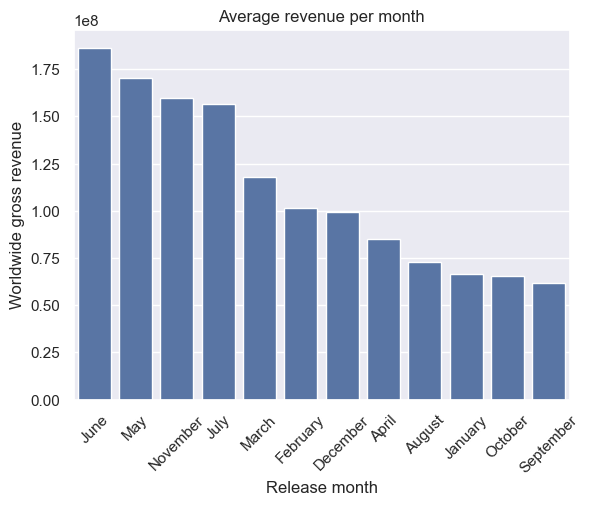

<Figure size 1000x600 with 0 Axes>

In [107]:
plt.title('Average revenue per month')
sns.barplot(month)
plt.xticks(rotation=45)
plt.ylabel('Worldwide gross revenue')
plt.xlabel('Release month')
sns.set_theme(font_scale=1.0)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

Movies released in the month of June on average made the most revenue with 186,440,000 dollars followed by May with 170,267,700 dollars.

In [92]:
large_budgets = merged_df.groupby('genres')['production_budget'].mean().sort_values(ascending=False).head(18)
large_budgets

genres
AdventureFantasy            2.316667e+08
ActionAdventureSci-Fi       1.617279e+08
AdventureDramaSport         1.500000e+08
AdventureAnimationDrama     1.450000e+08
AdventureDramaSci-Fi        1.365000e+08
AdventureFamilyFantasy      1.322750e+08
ActionAdventureFantasy      1.291692e+08
AdventureMysterySci-Fi      1.250000e+08
ActionAdventureWestern      1.231667e+08
ActionAdventureAnimation    1.218125e+08
ActionAdventureFamily       1.215000e+08
ActionAdventureThriller     1.168333e+08
ActionFantasyWar            1.100000e+08
AdventureAnimationComedy    9.790580e+07
ActionAdventureHorror       9.410000e+07
ActionCrimeFantasy          9.000000e+07
ActionFamilyFantasy         9.000000e+07
FamilyFantasyMusical        9.000000e+07
Name: production_budget, dtype: float64

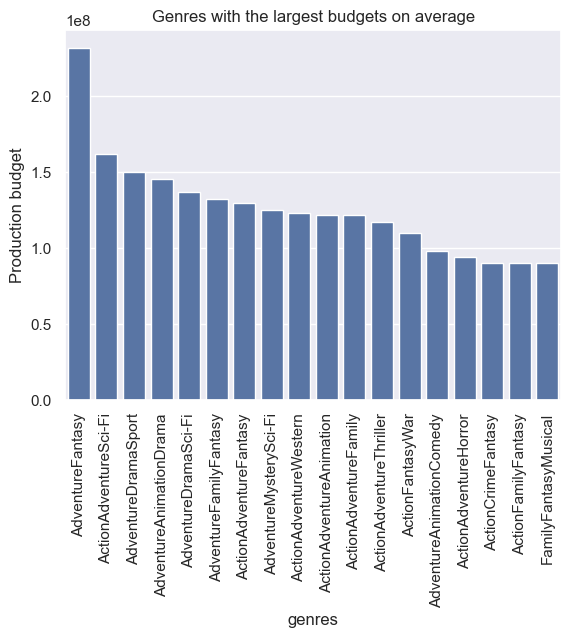

<Figure size 1000x600 with 0 Axes>

In [57]:
sns.barplot(large_budgets)
plt.xticks(rotation=90)
plt.ylabel('Production budget')
plt.title('Genres with the largest budgets on average')
sns.set_theme(font_scale=1.0)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

AdventureFantasy, ActionAdventureScifi, AdventureDramaSport have the largest production budgets on average with 231 million, 161million and 150million dollars respectively.

In [93]:
small_budgets = merged_df.groupby('genres')['production_budget'].mean().sort_values(ascending=True).head(18)
small_budgets

genres
FamilySci-Fi                    350000.0
DocumentarySport                350000.0
ComedyThriller                  400000.0
ActionRomanceSport              500000.0
ActionBiographyDocumentary      500000.0
CrimeDramaFamily                500000.0
HorrorMusical                   500000.0
ActionAdventureDocumentary      850000.0
ComedyFantasyThriller           900000.0
AdventureHorror                1000000.0
DramaFantasyMusical            1000000.0
ComedyCrimeHorror              1200000.0
ComedyRomanceThriller          1250000.0
AdventureDocumentaryHistory    1300000.0
CrimeRomanceThriller           1400000.0
DocumentaryHistoryWar          1500000.0
CrimeDocumentary               1500000.0
ComedyHorrorMystery            1500000.0
Name: production_budget, dtype: float64

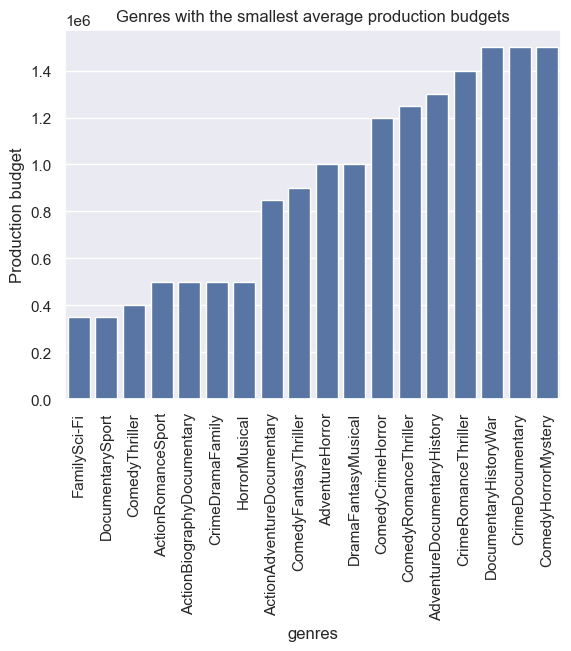

<Figure size 1000x600 with 0 Axes>

In [108]:
plt.title('Genres with the smallest average production budgets')
sns.barplot(small_budgets)
plt.xticks(rotation=90)
plt.ylabel('Production budget')
sns.set_theme(font_scale=1.0)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

FamilySci-Fi, DocumentarySport have the smallest production budgets on average with 350000 dollars.

In [60]:
ROI = merged_df.groupby('genres')['ROI(%)'].mean().sort_values(ascending=False).head(18)
ROI

genres
BiographyDocumentary       7717.711721
CrimeDramaFamily           6211.912000
DramaFamilyFantasy         4726.022386
ActionComedyDrama          4588.380705
HorrorMysteryThriller      2640.015111
CrimeFantasyThriller       1853.445161
FamilyFantasyMusical       1814.577738
AnimationFamilyFantasy     1776.418797
HorrorThriller             1275.752387
AdventureHorror            1193.142000
BiographyDramaFantasy      1167.944000
Horror                     1004.228353
ComedyFantasy               946.313826
ActionDramaHorror           822.796400
CrimeHorrorMystery          783.427693
ActionComedyDocumentary     758.428965
ComedyDocumentary           752.441810
AdventureDramaSport         748.313273
Name: ROI(%), dtype: float64

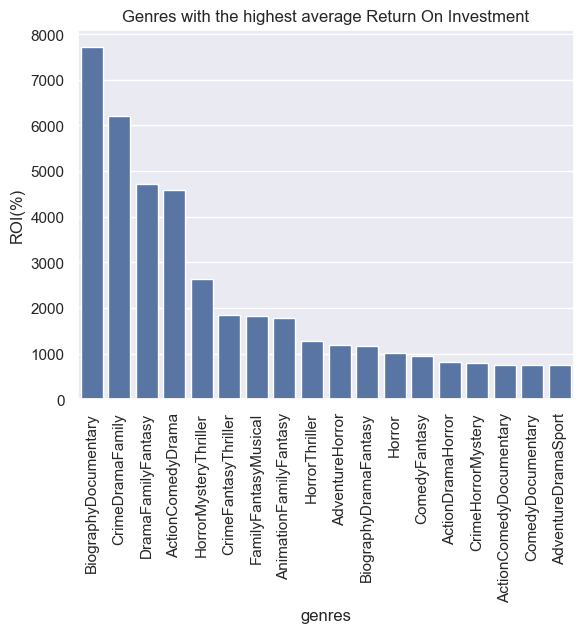

<Figure size 1000x600 with 0 Axes>

In [109]:
plt.title('Genres with the highest average Return On Investment')
sns.barplot(ROI)
plt.xticks(rotation=90)
plt.ylabel('ROI(%)')
sns.set_theme(font_scale=1.0)
plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()

BiographyDocumentary and CrimeDramaFamily have the highest ROI with 7717 and 6211 percent respectively meaning they are the most profitable genres on average.

## Multivariate analysis

In [62]:
data= merged_df[['production_budget','averagerating','worldwide_gross']].corr()

<Axes: >

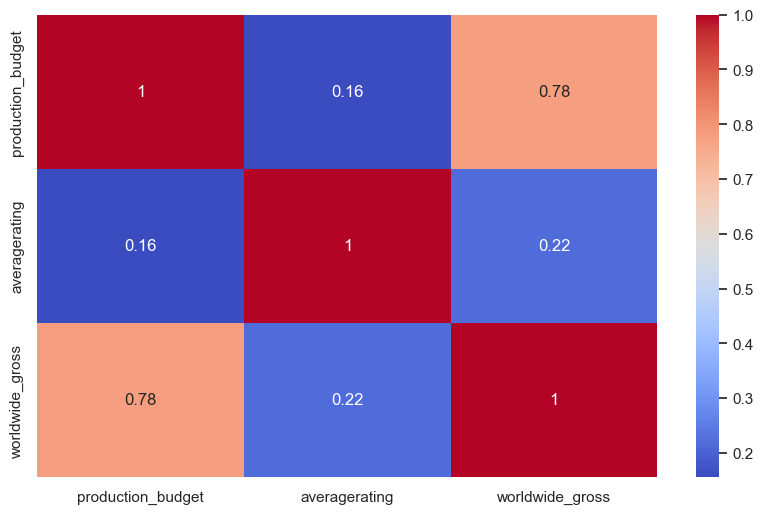

In [63]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(data, annot=True, cmap='coolwarm')  

* There is a weak positive correlation of 0.22 between average rating and world gross indicating that as the average rating increases the worldwide revenue also increases slightly.
* There is a strong positive correlation of 0.78 between production budget and worldwide revenue indicating that as the production budget increases the worldwide revenue also increases.
* There is a very weak positive correlation of 0.16 between average rating and production budget Implying that spending more money on a movie doesn't significantly improve audience ratings.


In [64]:
n = merged_df[['production_budget','averagerating','worldwide_gross']]

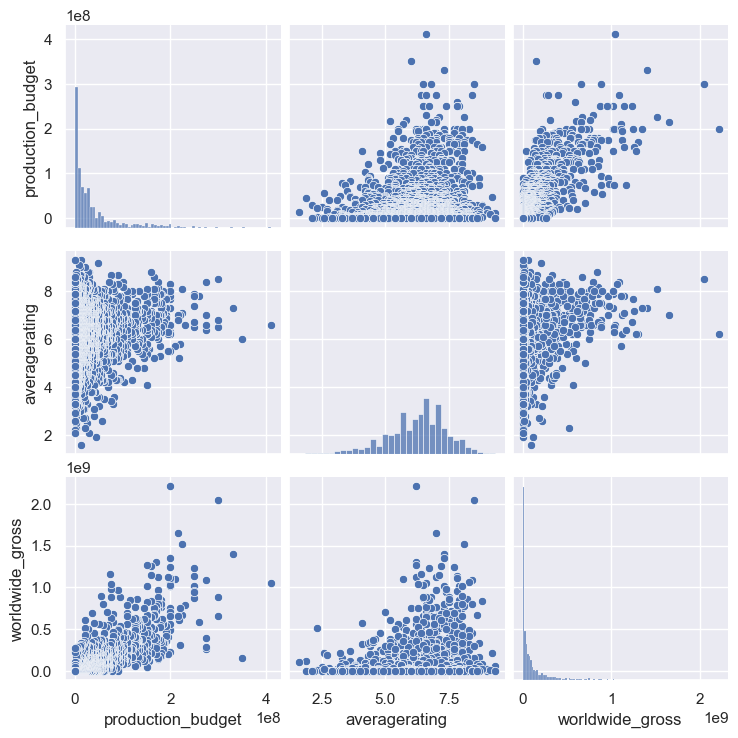

In [65]:
sns.pairplot(n)

* production budget vs worldwide gross revenue: Shows a positive trend therefore higher budgets are generally associated with higher gross revenue.
* averagerating vs worldwide gross revenue: Slight upward trend which suggests ratings have a weak relationship with revenue.
* production budget vs averagerating: Has no clear pattern therefore suggesting that higher budgets do not guarantee higher audience ratings.

In [66]:
merged_df

,id,release_month,movie,production_budget,domestic_gross,worldwide_gross,movie_id,averagerating,genres,release_date,numvotes,ROI(%)
1,2,May,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,tt1298650,6.6,ActionAdventureFantasy,2011,447624,154.667286
2,3,June,Dark Phoenix,350000000,42762350,149762350,tt6565702,6.0,ActionAdventureSci-Fi,2019,24451,-57.210757
3,4,May,Avengers: Age of Ultron,330600000,459005868,1403013963,tt2395427,7.3,ActionAdventureSci-Fi,2015,665594,324.384139
6,7,April,Avengers: Infinity War,300000000,678815482,2048134200,tt4154756,8.5,ActionAdventureSci-Fi,2018,670926,582.711400
8,9,November,Justice League,300000000,229024295,655945209,tt0974015,6.5,ActionAdventureFantasy,2017,329135,118.648403
...,...,...,...,...,...,...,...,...,...,...,...,...
5761,62,December,Stories of Our Lives,15000,0,0,tt3973612,7.5,Drama,2014,85,-100.000000
5767,68,July,Cure,10000,94596,94596,tt1872026,4.9,Drama,2011,11,845.960000
5772,73,January,Newlyweds,9000,4584,4584,tt1880418,6.4,ComedyDrama,2011,1436,-49.066667
5777,78,December,Red 11,7000,0,0,tt7837402,5.6,HorrorSci-FiThriller,2019,43,-100.000000


## Recommendations

1.  Prioritize producing AdventureDramaSci-Fi and ActionAdventureSci-Fi movies, which not only perform well in terms of worldwide gross revenue but also attract high audience engagement.
2.  Release movies mainly in June as this is the month where movies released generate the most revenue more than any other month.
3.  CrimeDramaFamily and DramaFantasyMusical are the best options to venture into when working with a small budget since they require a small budget on average but generate huge profits.
4.  FamilyFantasyMusical and AdventureDramaSport genres are the best options to venture into with a sizable budget since they require large budgets but generate huge profits.



In [67]:
merged_df.to_csv('merged_df.csv')

PermissionError: [Errno 13] Permission denied: 'merged_df.csv'